In [28]:
import requests
from bs4 import BeautifulSoup

In [29]:
url = "http://books.toscrape.com"

In [30]:
response = requests.get(url)

In [31]:
soup = BeautifulSoup(response.text, 'html.parser')

In [32]:
books = soup.find_all('article', class_='product_pod')

In [33]:
for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    print(f"Title: {title}\nPrice: {price}\n")

Title: A Light in the Attic
Price: Â£51.77

Title: Tipping the Velvet
Price: Â£53.74

Title: Soumission
Price: Â£50.10

Title: Sharp Objects
Price: Â£47.82

Title: Sapiens: A Brief History of Humankind
Price: Â£54.23

Title: The Requiem Red
Price: Â£22.65

Title: The Dirty Little Secrets of Getting Your Dream Job
Price: Â£33.34

Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price: Â£17.93

Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price: Â£22.60

Title: The Black Maria
Price: Â£52.15

Title: Starving Hearts (Triangular Trade Trilogy, #1)
Price: Â£13.99

Title: Shakespeare's Sonnets
Price: Â£20.66

Title: Set Me Free
Price: Â£17.46

Title: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Price: Â£52.29

Title: Rip it Up and Start Again
Price: Â£35.02

Title: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Price: Â£57.25

Title: Olio
Price

In [34]:
ook_data = []
books = soup.find_all('article', class_='product_pod')

for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    print(f"Title: {title}\nPrice: {price}\n")
    book_data.append({"Title": title, "Price": price})

Title: A Light in the Attic
Price: Â£51.77

Title: Tipping the Velvet
Price: Â£53.74

Title: Soumission
Price: Â£50.10

Title: Sharp Objects
Price: Â£47.82

Title: Sapiens: A Brief History of Humankind
Price: Â£54.23

Title: The Requiem Red
Price: Â£22.65

Title: The Dirty Little Secrets of Getting Your Dream Job
Price: Â£33.34

Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price: Â£17.93

Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price: Â£22.60

Title: The Black Maria
Price: Â£52.15

Title: Starving Hearts (Triangular Trade Trilogy, #1)
Price: Â£13.99

Title: Shakespeare's Sonnets
Price: Â£20.66

Title: Set Me Free
Price: Â£17.46

Title: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Price: Â£52.29

Title: Rip it Up and Start Again
Price: Â£35.02

Title: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Price: Â£57.25

Title: Olio
Price

In [35]:
import pandas as pd
df = pd.DataFrame(book_data)
print(df)

                                                Title    Price
0                                A Light in the Attic  Â£51.77
1                                  Tipping the Velvet  Â£53.74
2                                          Soumission  Â£50.10
3                                       Sharp Objects  Â£47.82
4               Sapiens: A Brief History of Humankind  Â£54.23
5                                     The Requiem Red  Â£22.65
6   The Dirty Little Secrets of Getting Your Dream...  Â£33.34
7   The Coming Woman: A Novel Based on the Life of...  Â£17.93
8   The Boys in the Boat: Nine Americans and Their...  Â£22.60
9                                     The Black Maria  Â£52.15
10     Starving Hearts (Triangular Trade Trilogy, #1)  Â£13.99
11                              Shakespeare's Sonnets  Â£20.66
12                                        Set Me Free  Â£17.46
13  Scott Pilgrim's Precious Little Life (Scott Pi...  Â£52.29
14                          Rip it Up and Start Again  

In [42]:
book_data = []
conversion_rate = 82  
for book in books:
    title = book.h3.a['title']
    price_raw = book.find('p', class_='price_color').text
    price_cleaned = price_raw.replace('Â', '').replace('£', '').strip()
    price_gbp = float(price_cleaned)
    price_inr = price_gbp * conversion_rate

    print(f"Title: {title}\nPrice in GBP: £{price_gbp:.2f}\nPrice in INR: ₹{price_inr:.2f}\n")
    
    book_data.append({
        "Title": title,
        "Price in GBP": f"£{price_gbp:.2f}",
        "Price in INR": f"₹{price_inr:.2f}"
    })


Title: A Light in the Attic
Price in GBP: £51.77
Price in INR: ₹4245.14

Title: Tipping the Velvet
Price in GBP: £53.74
Price in INR: ₹4406.68

Title: Soumission
Price in GBP: £50.10
Price in INR: ₹4108.20

Title: Sharp Objects
Price in GBP: £47.82
Price in INR: ₹3921.24

Title: Sapiens: A Brief History of Humankind
Price in GBP: £54.23
Price in INR: ₹4446.86

Title: The Requiem Red
Price in GBP: £22.65
Price in INR: ₹1857.30

Title: The Dirty Little Secrets of Getting Your Dream Job
Price in GBP: £33.34
Price in INR: ₹2733.88

Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price in GBP: £17.93
Price in INR: ₹1470.26

Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price in GBP: £22.60
Price in INR: ₹1853.20

Title: The Black Maria
Price in GBP: £52.15
Price in INR: ₹4276.30

Title: Starving Hearts (Triangular Trade Trilogy, #1)
Price in GBP: £13.99
Price in INR: ₹1147.18

Title: Shake

Highest Priced Book:
Title    Our Band Could Be Your Life: Scenes from the A...
Price                                              Â£57.25
Name: 15, dtype: object


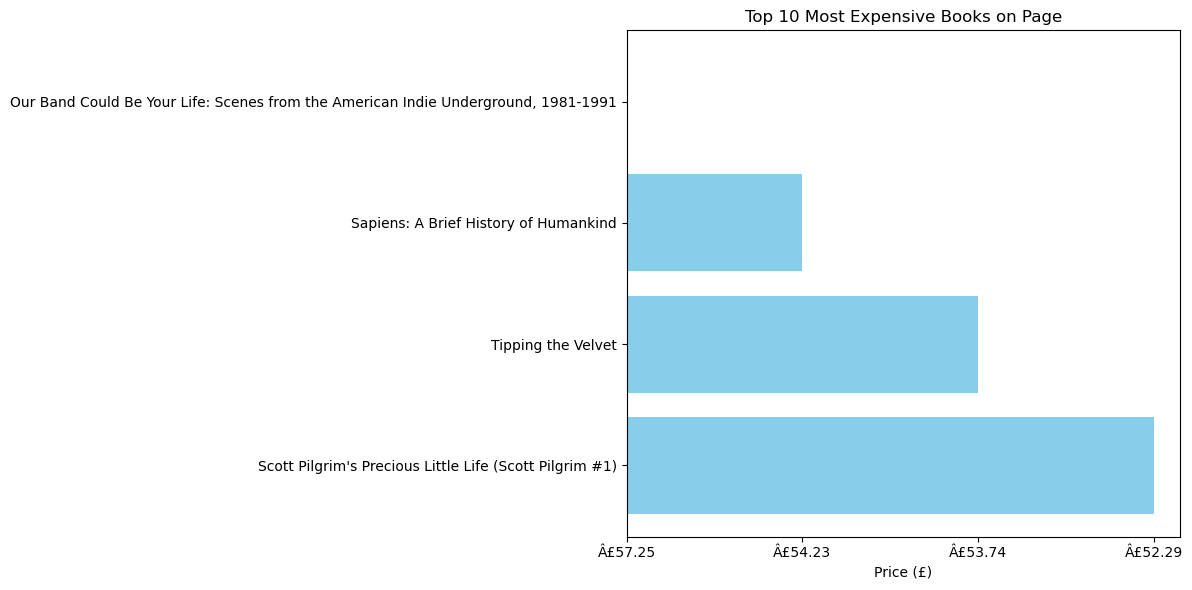

In [ ]:
import matplotlib.pyplot as plt
highest = df.loc[df['Price'].idxmax()]
print("Highest Priced Book:")
print(highest)


plt.figure(figsize=(12, 6))
top10 = df.sort_values(by="Price", ascending=False).head(10)
plt.barh(top10["Title"], top10["Price"], color='skyblue')
plt.xlabel("Price (£)")
plt.title("Top 10 Most Expensive Books on Page")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()